In [1]:
import pickle

FILEPATH = 'babble.pkl'
with open(FILEPATH, 'rb') as f:
    Ls, Ys = pickle.load(f)

In [2]:
from metal import MajorityLabelVoter, RandomVoter

rv = RandomVoter(seed=2)
_ = rv.score(Ls[1], Ys[1], metric'f1')

mv = MajorityLabelVoter(seed=2)
_ = mv.score(Ls[1], Ys[1], metric'f1')

Overwriting seed=None to seed=2
F1: 0.123
Overwriting seed=None to seed=2
F1: 0.377


Overwriting seed=None to seed=2
Overwriting n_epochs=100 to n_epochs=500
Overwriting l2=0.0 to l2=0.1
Overwriting print_every=10 to print_every=100
Reaffirming lr=0.01
Reaffirming show_plots=True
[Epoch 0] Loss: 64.747282
[Epoch 100] Loss: 0.421346
[Epoch 200] Loss: 0.420033
[Epoch 300] Loss: 0.419935
[Epoch 400] Loss: 0.419902
[Epoch 499] Loss: 0.419887
Finished Training
    Polarity  Coverage  Overlaps  Conflicts  Correct  Incorrect  Emp. Acc.  \
0          2  0.904992  0.156765   0.156389    17891       1379   0.928438   
1          1  0.000704  0.000704   0.000611        4         11   0.266667   
2          1  0.076269  0.076269   0.071526      489       1135   0.301108   
3          1  0.001738  0.001738   0.001738       11         26   0.297297   
4          1  0.083267  0.082281   0.078711      500       1273   0.282008   
5          1  0.055229  0.055229   0.051801      434        742   0.369048   
6          2  0.055981  0.009252   0.009205     1190          2   0.998322   
7

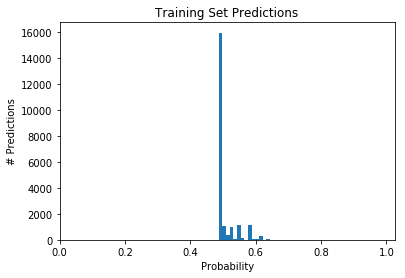

Confusion Matrix (Dev)
        y=1    y=2   
 l=1    119    488   
 l=2    70    2018   
Precision: 0.197
Recall: 0.635
F1: 0.300


In [3]:
from metal import LabelModel, ModelTuner

train_params = {
    'n_epochs': 500,
    'l2': 0.1,
    'print_every': 100,
    'lr': 0.01,
    'show_plots': True,
}
label_aggregator = LabelModel(seed=2)
label_aggregator.train(Ls[0], Y_train=Ys[0], L_dev=Ls[1], Y_dev=Ys[1], **train_params)
_ = label_aggregator.score(Ls[1], Ys[1], metric=['precision', 'recall', 'f1'])

In [ ]:
search_space = {
    'n_epochs': [0, 100, 200, 500],
    'l2': [0, 0.001, 0.01, 0.1, 1],
    'print_every': 100,
    'lr': [0.01, 0.001],
}
tuner = ModelTuner(LabelModel)
init_args=[]
train_args=[Ls[0]]
model, config = tuner.search(init_args, train_args, Ls[1], Ys[1], 
                             search_space, max_search=10, metric='f1')

In [ ]:
from metal.analysis import (
    error_buckets, confusion_matrix, 
    view_label_matrix, view_overlaps, view_conflicts,
    lf_summary, lf_polarities, lf_coverages, lf_overlaps, lf_conflicts
)
# est_accs = label_aggregator.accs()
est_accs = label_aggregator._alphas().numpy()
df = lf_summary(Ls[0], Ys[0], est_accs=est_accs)
df

### Snorkel GM

In [ ]:
from snorkel.learning.gen_learning import GenerativeModel

gm = GenerativeModel(lf_propensity=True)
gm.train(Ls_bin[0], step_size=0.01, reg_param=0.25)

In [ ]:
from metal.analysis import plot_probabilities_histogram
probs = gm.marginals(Ls_bin[1])
plot_probabilities_histogram(probs)

In [ ]:
Y_p = gm.predictions(Ls_bin[1])

In [ ]:
from metal.utils import binary_to_categorical
Y_p = binary_to_categorical(Y_p)

In [ ]:
from metal.metrics import metric_score

metric_score(Ys_bin[1], Y_p, metric='precision')
metric_score(Ys_bin[1], Y_p, metric='recall')
metric_score(Ys_bin[1], Y_p, metric='f1')